In [1]:
import sys
!{sys.executable} -m pip install --upgrade matplotlib pandas pip
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("paper.csv", delimiter=" ")

In [3]:
sr = df.to_dict(orient="records")
sr

[{'inputs': 2,
  'snt': 'batcher',
  'do_max': False,
  'try_min': True,
  'try_max': False,
  'prune': True,
  'slice': -1,
  'backend': 'sat',
  'fallback': False,
  'reallocate': True,
  'prog_len': 4,
  'prog_saved': 0,
  'prog_regs': 3,
  'cpu_time': 0.000739},
 {'inputs': 2,
  'snt': 'batcher',
  'do_max': False,
  'try_min': True,
  'try_max': False,
  'prune': True,
  'slice': -1,
  'backend': 'z3',
  'fallback': False,
  'reallocate': True,
  'prog_len': 4,
  'prog_saved': 0,
  'prog_regs': 3,
  'cpu_time': 0.000815},
 {'inputs': 2,
  'snt': 'batcher',
  'do_max': False,
  'try_min': True,
  'try_max': False,
  'prune': True,
  'slice': 0,
  'backend': 'sat',
  'fallback': False,
  'reallocate': True,
  'prog_len': 4,
  'prog_saved': 0,
  'prog_regs': 3,
  'cpu_time': 0.001029},
 {'inputs': 2,
  'snt': 'batcher',
  'do_max': False,
  'try_min': True,
  'try_max': False,
  'prune': True,
  'slice': 1,
  'backend': 'sat',
  'fallback': False,
  'reallocate': True,
  'prog_len': 

In [4]:
r1 = [{"inputs": r["inputs"], "standard": r["prog_len"]+r["prog_saved"], "optimized": r["prog_len"]} for r in sr if r["snt"] == "batcher" and r["slice"] == -1 and r["backend"] == "sat" and r["prune"] and r["inputs"] <= 128]
df1 = pd.DataFrame(r1)
df1


,inputs,standard,optimized
0,2,4,4
1,3,12,12
2,4,20,20
3,5,36,35
4,6,48,47
...,...,...,...
122,124,5700,5571
123,125,5764,5635
124,126,5808,5679
125,127,5856,5727


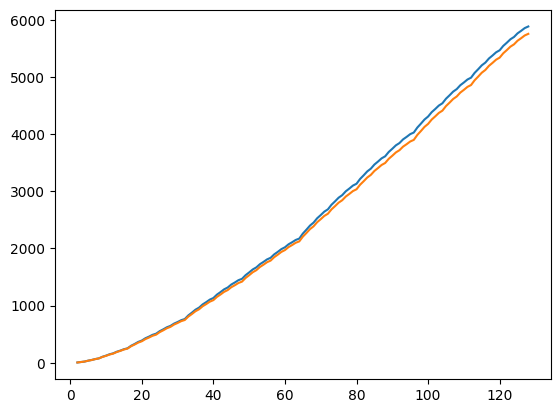

In [5]:
plt.plot(df1["inputs"], df1["standard"])
plt.plot(df1["inputs"], df1["optimized"])

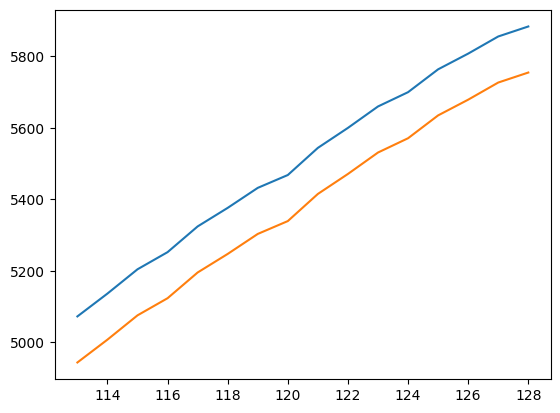

In [6]:
plt.plot(df1["inputs"][-16:], df1["standard"][-16:])
plt.plot(df1["inputs"][-16:], df1["optimized"][-16:])


In [7]:
r2 = [{"inputs": r["inputs"], "standard": r["inputs"]+1, "optimized": r["prog_regs"]} for r in sr if r["snt"] == "batcher" and r["slice"] == -1 and r["backend"] == "sat" and r["prune"] and r["inputs"] <= 128]
df2 = pd.DataFrame(r2)
df2


,inputs,standard,optimized
0,2,3,3
1,3,4,4
2,4,5,5
3,5,6,6
4,6,7,7
...,...,...,...
122,124,125,141
123,125,126,142
124,126,127,143
125,127,128,144


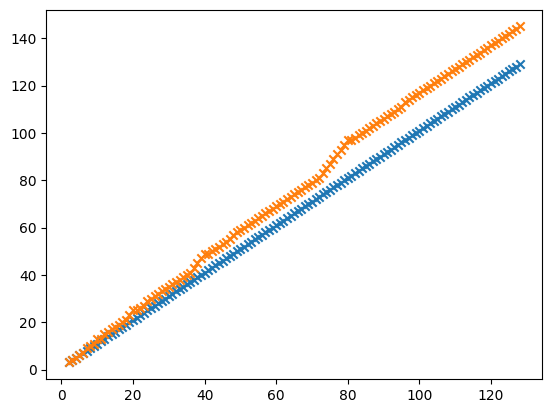

In [8]:
plt.scatter(df2["inputs"], df2["standard"], marker="x")
plt.scatter(df2["inputs"], df2["optimized"], marker="x")
plt.savefig("figure_registers.pdf", format="pdf", bbox_inches="tight")

In [9]:
r3_z3 = [r["cpu_time"] for r in sr if r["snt"] == "batcher" and r["slice"] == -1 and r["backend"] == "z3" and r["prune"] and r["inputs"] <= 64]
r3_sat = [r["cpu_time"] for r in sr if r["snt"] == "batcher" and r["slice"] == -1 and r["backend"] == "sat" and r["prune"] and r["inputs"] <= 64]

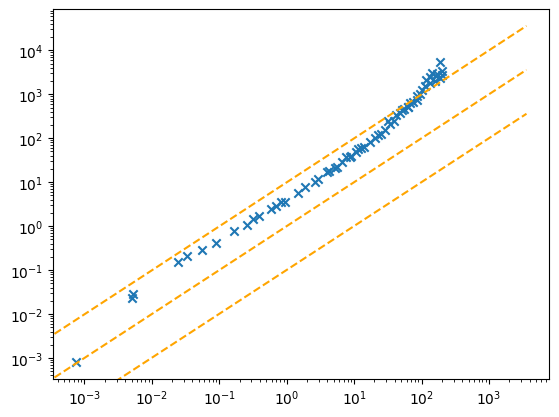

In [10]:
plt.scatter(r3_sat, r3_z3, marker="x")
plt.plot([0,3600], [0,3600], ls="--", color="orange")
plt.plot([0,3600], [0,36000], ls="--", color="orange")
plt.plot([0,3600], [0,360], ls="--", color="orange")
plt.xscale("log")
plt.yscale("log")
plt.savefig("figure_sat_vs_z3.pdf", format="pdf", bbox_inches="tight")

In [11]:
r3_noslice = [r["cpu_time"] for r in sr if r["snt"] == "batcher" and r["slice"] == 0 and r["backend"] == "sat" and r["prune"] and r["inputs"] <= 64]
r3_slice = [r["cpu_time"] for r in sr if r["snt"] == "batcher" and r["slice"] == -1 and r["backend"] == "sat" and r["prune"] and r["inputs"] <= 64]

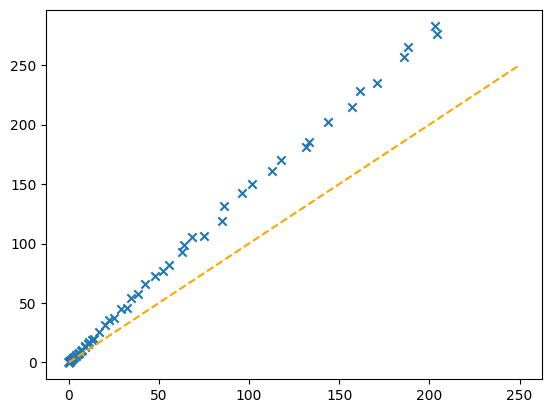

In [12]:
plt.scatter(r3_slice, r3_noslice, marker="x")
plt.plot([0,250], [0,250], ls="--", color="orange")
#plt.xscale("log")
#plt.yscale("log")
plt.savefig("figure_slicing.pdf", format="pdf", bbox_inches="tight")

In [13]:
inputs = [2, 3, 4, 5, 6, 7, 8]
comps = [1, 3, 5, 9, 12, 16, 19]
naive_length = [2*n+4*m for n, m in zip(inputs, comps)]
naive_saved = [0 for n in inputs]
alphadev_length = [8, 17, 28, 42, 57, 76, 91] 
alphadev_saved = [n-m for n, m in zip(naive_length, alphadev_length)]
systematized_length = [8, 17, 28, 43, 57, 74, 91] 
systematized_saved = [n-m for n, m in zip(naive_length, systematized_length)]
df4 = pd.DataFrame({
    "inputs": inputs,
    "comps": comps,
    "naive_length": naive_length,
    "alphadev_length": alphadev_length,
    "systematized_length": systematized_length,
    "naive_saved": naive_saved,
    "alphadev_saved": alphadev_saved,
    "systematized_saved": systematized_saved,
})
df4

,inputs,comps,naive_length,alphadev_length,systematized_length,naive_saved,alphadev_saved,systematized_saved
0,2,1,8,8,8,0,0,0
1,3,3,18,17,17,0,1,1
2,4,5,28,28,28,0,0,0
3,5,9,46,42,43,0,4,3
4,6,12,60,57,57,0,3,3
5,7,16,78,76,74,0,2,4
6,8,19,92,91,91,0,1,1


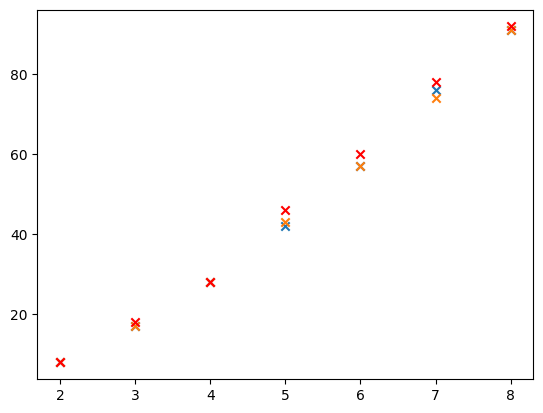

In [14]:
plt.scatter(inputs, alphadev_length, marker="x")
plt.scatter(inputs, systematized_length, marker="x")
plt.scatter(inputs, naive_length, marker="x", color="red")


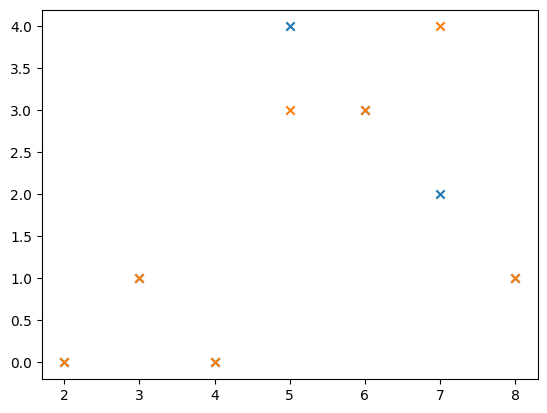

In [15]:
plt.scatter(inputs, alphadev_saved, marker="x")
plt.scatter(inputs, systematized_saved, marker="x")


In [16]:
r5 = [{"inputs": r["inputs"], "saved": r["prog_saved"]} for r in sr if r["snt"] == "batcher" and r["slice"] == -1 and r["backend"] == "sat" and r["prune"] and r["inputs"] <= 128]
df5 = pd.DataFrame(r5)
df5


,inputs,saved
0,2,0
1,3,0
2,4,0
3,5,1
4,6,1
...,...,...
122,124,129
123,125,129
124,126,129
125,127,129


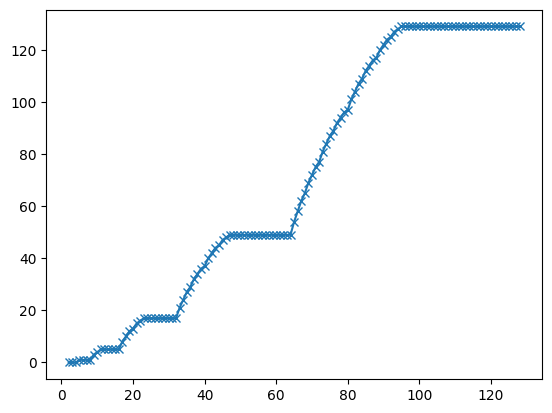

In [17]:
plt.plot(df5["inputs"], df5["saved"], marker="x")
plt.savefig("figure_saved.pdf", format="pdf", bbox_inches="tight")